In [43]:
import random
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf
import random

from tensorflow.keras import layers, Sequential, layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [44]:
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['image.cmap'] = 'gray'

from tensorflow.keras.datasets import fashion_mnist

In [45]:
SEED_VALUE = 42

random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [46]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain.shape, ytrain.shape

((60000, 28, 28), (60000,))

In [47]:
xvalid = xtrain[:10000]
xtrain = xtrain[10000:]

yvalid = ytrain[:10000]
ytrain = ytrain[10000:]

print(xtrain.shape)
print(xvalid.shape)
print(xtest.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


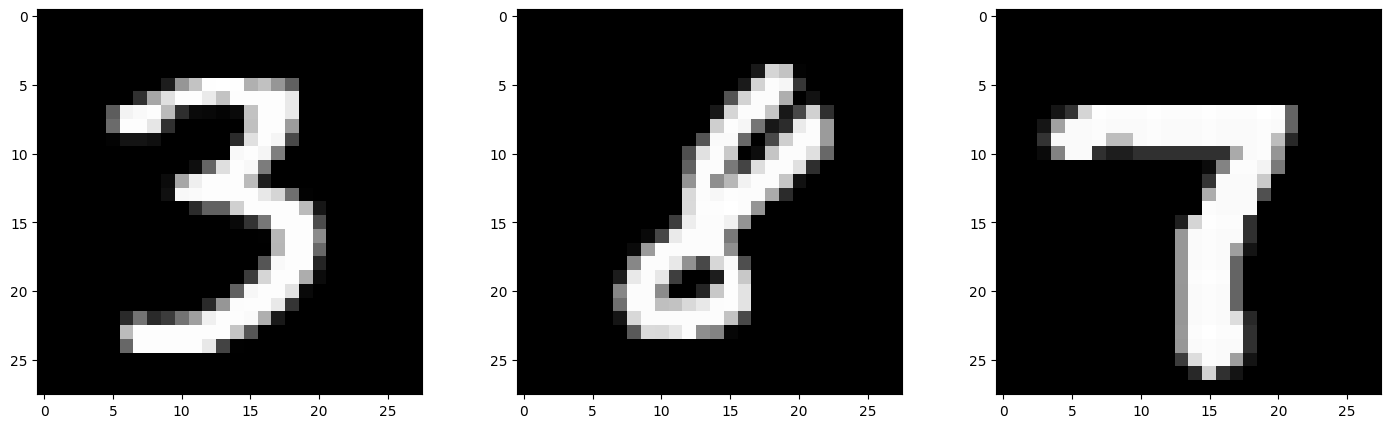

In [48]:
plt.figure(figsize=(18,5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.axis(True)
    plt.imshow(xtrain[i], cmap='gray')
    plt.subplots_adjust(wspace=0.1, hspace=0.2)
    


In [49]:
xtrain.shape

(50000, 28, 28)

In [50]:
xtrain = xtrain.reshape(xtrain.shape[0], 28 * 28)
xtrain = xtrain.astype('float32') / 255

xtest = xtest.reshape(xtest.shape[0], 28 * 28)
xtest = xtest.astype('float32') / 255

xvalid = xvalid.reshape(xvalid.shape[0], 28 * 28)
xvalid = xvalid.astype('float32')/ 255

In [51]:
((xtrain_fashion, ytrain_fashion), (_, _)) = fashion_mnist.load_data()
print(ytrain_fashion[:9])

[9 0 0 3 0 2 7 2 5]


In [52]:
ytrain_onehot = to_categorical(ytrain_fashion[0:9])
ytrain_onehot

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [53]:
ytrain = to_categorical(ytrain)
yvalid = to_categorical(yvalid)
ytest = to_categorical(ytest)

In [54]:
model = tf.keras.Sequential()

model.add(Dense(128, activation='relu', input_shape=(xtrain.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

c:\Users\PC\Desktop\project\bootcamp\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [56]:
training_result = model.fit(
    xtrain,
    ytrain,
    epochs=21,
    batch_size=64,
    validation_data=(xvalid, yvalid)
)

Epoch 1/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9173 - loss: 0.2833 - val_accuracy: 0.9450 - val_loss: 0.1755
Epoch 2/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9638 - loss: 0.1217 - val_accuracy: 0.9611 - val_loss: 0.1265
Epoch 3/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9757 - loss: 0.0828 - val_accuracy: 0.9670 - val_loss: 0.1105
Epoch 4/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9822 - loss: 0.0608 - val_accuracy: 0.9688 - val_loss: 0.1117
Epoch 5/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9865 - loss: 0.0470 - val_accuracy: 0.9702 - val_loss: 0.1133
Epoch 6/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9896 - loss: 0.0360 - val_accuracy: 0.9717 - val_loss: 0.1157
Epoch 7/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9923 - loss: 0.0278 - val_accuracy: 0.9703 - val_loss: 0.1235
Epoch 8/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9932 - loss: 0.0231 - val_accuracy: 0.

In [57]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15,4))
    
    if not (isinstance(metric_name, list)) or isinstance(metric_name, tuple):
        metrics = [metrics,]
        metric_name = [metric_name, ]
        
    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])
    
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 20])
    plt.ylim(ylim)
    
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

[0.2833331823348999, 0.12170819193124771, 0.08277522772550583, 0.06083987280726433, 0.04695194959640503, 0.03604993224143982, 0.027775241062045097, 0.023068303242325783, 0.01762653887271881, 0.015440581366419792, 0.012107614427804947, 0.01165703497827053, 0.009495232254266739, 0.007537431549280882, 0.006971506867557764, 0.004990028217434883, 0.005193366669118404, 0.00573195843026042, 0.004222488030791283, 0.005036081187427044, 0.003979100845754147]
[0.17553968727588654, 0.12653328478336334, 0.11053742468357086, 0.1116841658949852, 0.11325283348560333, 0.11571091413497925, 0.123531274497509, 0.1304716318845749, 0.15099360048770905, 0.1674233227968216, 0.15916717052459717, 0.1497829705476761, 0.15348322689533234, 0.1812126487493515, 0.16301055252552032, 0.16203394532203674, 0.17699883878231049, 0.16774030029773712, 0.1843530833721161, 0.18979331851005554, 0.1857576221227646]


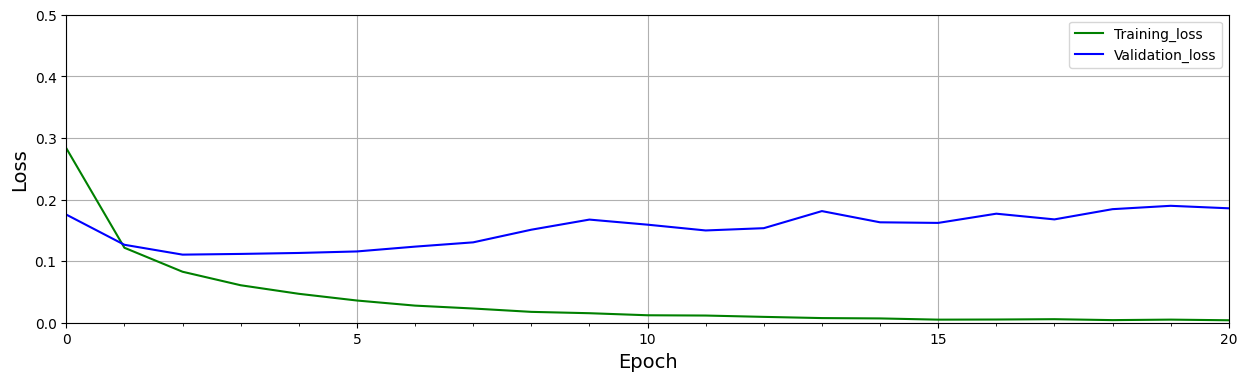

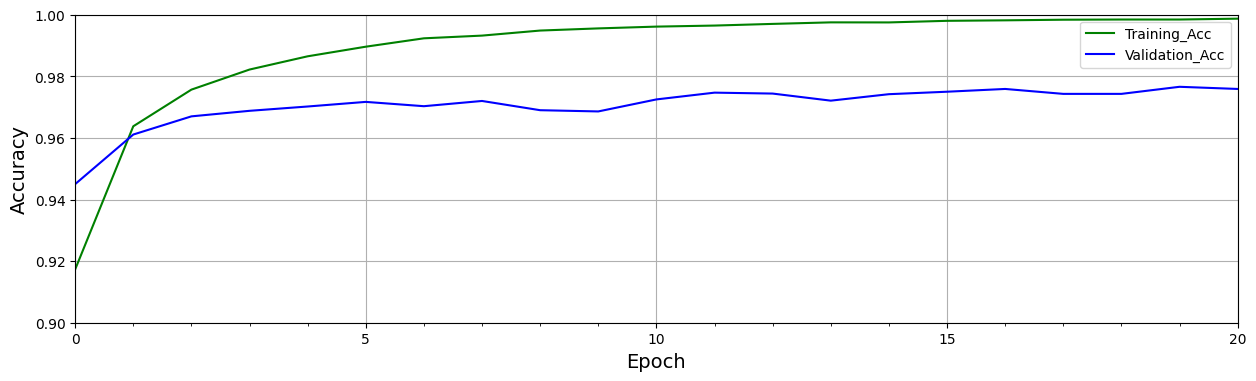

In [60]:
train_loss = training_result.history['loss']
train_acc = training_result.history['accuracy']
valid_loss = training_result.history['val_loss']
valid_acc = training_result.history['val_accuracy']

print(train_loss)
print(valid_loss)

plot_results(
    [train_loss, valid_loss],
    ylabel='Loss',
    ylim=[0.0, 0.5],
    metric_name=['Training_loss', 'Validation_loss'],
    color=['g', 'b']
)

plot_results(
    [train_acc, valid_acc],
    ylabel='Accuracy',
    ylim=[0.9, 1.0],
    metric_name=['Training_Acc', 'Validation_Acc'],
    color=['g', 'b']
)


In [63]:
prediction = model.predict(xtest)
print(prediction.shape)
index = 0
print('Ground truth for test digit: ', ytest[index])
print('Predictions for each class:')
for i in range(10):
    print('digit:', i, ' probablilty: ', prediction[index][i])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step
(10000, 10)
Ground truth for test digit:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Predictions for each class:
digit: 0  probablilty:  9.279625e-23
digit: 1  probablilty:  2.6310344e-22
digit: 2  probablilty:  4.619332e-16
digit: 3  probablilty:  1.5870901e-16
digit: 4  probablilty:  4.9132485e-28
digit: 5  probablilty:  5.8661225e-26
digit: 6  probablilty:  3.1479648e-36
digit: 7  probablilty:  1.0
digit: 8  probablilty:  5.740219e-23
digit: 9  probablilty:  1.590943e-19


In [74]:
predictions = model.predict(xtest)
print(predictions.shape)
prediction_labels = [np.argmax(i) for i in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step
(10000, 10)


In [71]:
ytest.shape

(10000, 10)

In [75]:
y_test_integer_labels = np.argmax(ytest, axis=1)
y_test_integer_labels

array([7, 2, 1, ..., 4, 5, 6])

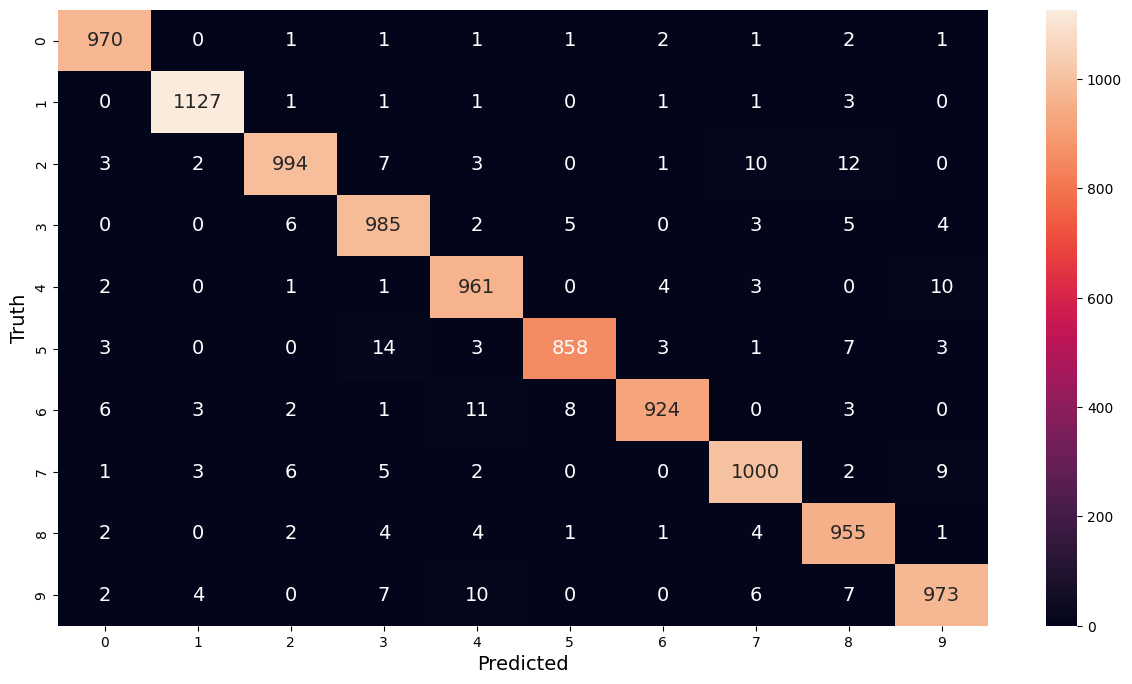

In [76]:
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=prediction_labels)

plt.figure(figsize=(15, 8))
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 14})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()